<a href="https://colab.research.google.com/github/aimee-annabelle/Peer_Group_10_Water_Quality_Model/blob/reponse/Reponse_Ashimwe_formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.datasets import make_classification
from sklearn.utils import class_weight

# Load the dataset
df = pd.read_csv('water_potability.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (3276, 10)

First few rows:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Data Loading and Initial Preprocessing

Plot the Data Appropriately

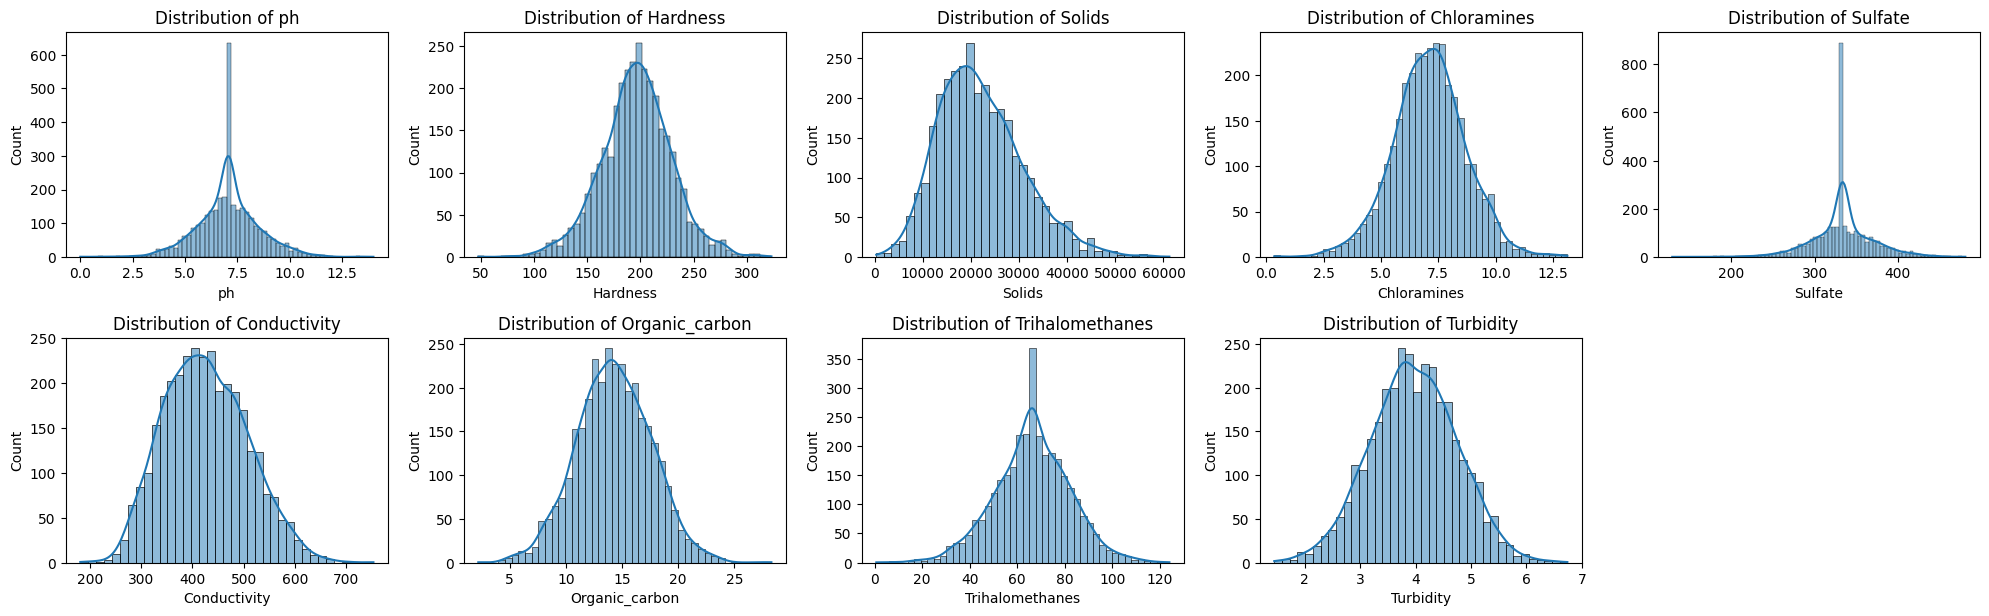

<Figure size 1800x700 with 0 Axes>

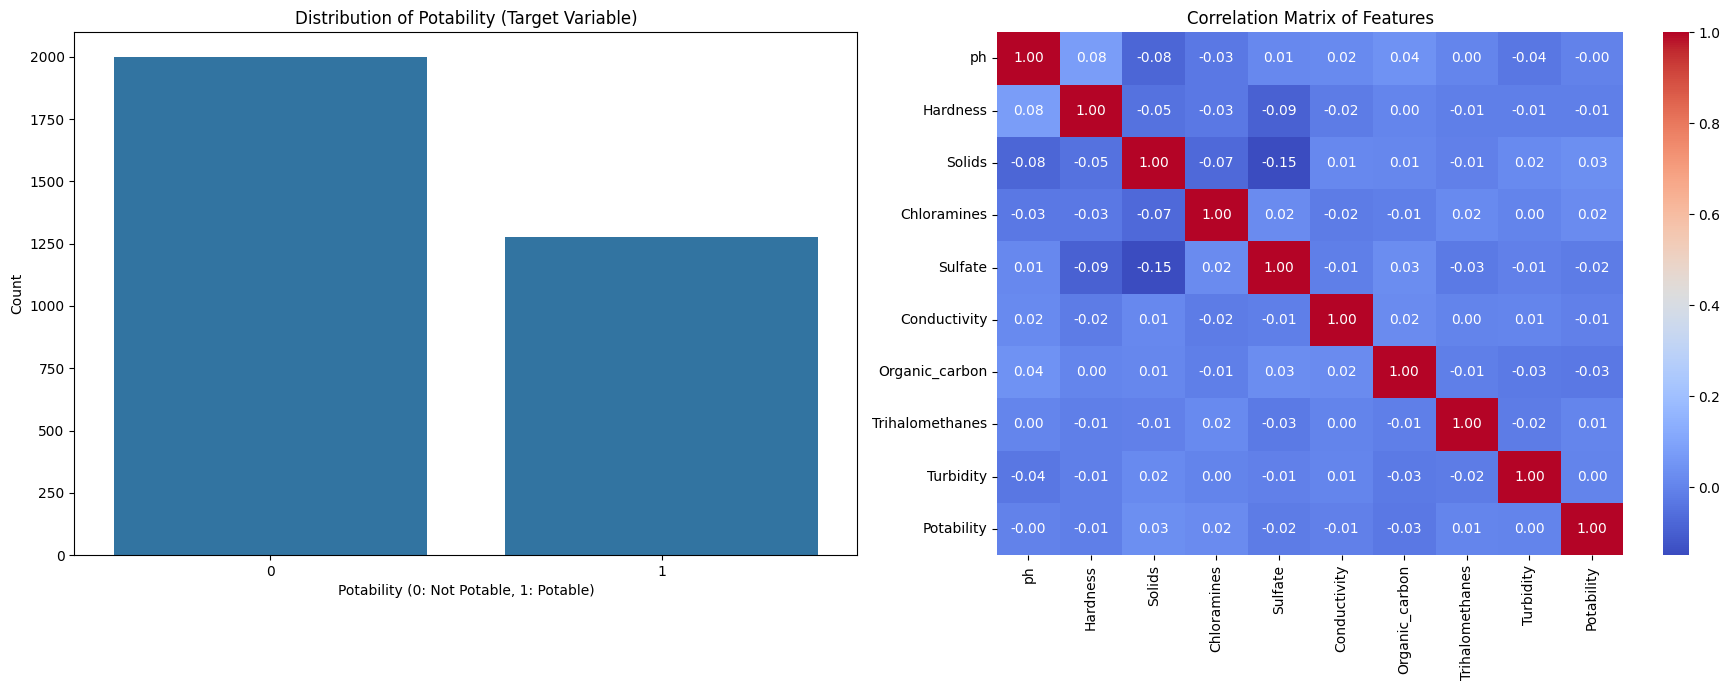

In [6]:
# Handle missing values: Impute numerical columns with their mean
for column in ['ph', 'Sulfate', 'Trihalomethanes']:
    if df[column].isnull().any():
        df[column].fillna(df[column].mean(), inplace=True)

# Split features (X) and target (Y) - These are for the *main* dataset
X = df.drop('Potability', axis=1)
Y = df['Potability']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot distribution of each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1]): # Exclude 'Potability'
    plt.subplot(5, 5, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 7))


plt.figure(figsize=(18, 7))

# Plot the distribution of the target variable
plt.subplot(1, 2, 1)
sns.countplot(x='Potability', data=df)
plt.title('Distribution of Potability (Target Variable)')
plt.xlabel('Potability (0: Not Potable, 1: Potable)')
plt.ylabel('Count')

# Plot correlation heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')

plt.tight_layout()
plt.show()



In [7]:
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_scaled, Y, test_size=0.30, random_state=42, stratify=Y
)

X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.50, random_state=42, stratify=Y_temp
)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)


(2293, 9)
(491, 9)
(492, 9)
(2293,)
(491,)
(492,)


# Each Memeber Defines their model Here

In [20]:
def response_model(input_dim):
    MY_LEARNING_RATE = 0.002
    MY_L2_REGULARIZATION_STRENGTH = 0.007
    MY_DROPOUT_RATE = 0.45
    MY_EARLY_STOPPING_PATIENCE = 20
    MY_MOMENTUM = 0.9


    # Simplified architecture with strong regularization
    model = Sequential([
        # First layer - moderate capacity
        Dense(64, input_shape=(input_dim,),
              kernel_regularizer=l2(MY_L2_REGULARIZATION_STRENGTH),
              kernel_initializer='he_normal',
              name='dense_input'),
        BatchNormalization(name='bn_1'),
        Activation('relu'),
        Dropout(MY_DROPOUT_RATE, name='dropout_1'),

        # Second layer - focused capacity
        Dense(48,
              kernel_regularizer=l2(MY_L2_REGULARIZATION_STRENGTH),
              kernel_initializer='he_normal',
              name='dense_hidden_1'),
        BatchNormalization(name='bn_2'),
        Activation('relu'),
        Dropout(MY_DROPOUT_RATE, name='dropout_2'),

        # Third layer - final processing
        Dense(24,
              kernel_regularizer=l2(MY_L2_REGULARIZATION_STRENGTH),
              kernel_initializer='he_normal',
              name='dense_hidden_2'),
        BatchNormalization(name='bn_3'),
        Activation('relu'),
        Dropout(MY_DROPOUT_RATE, name='dropout_3'),

        Dense(1, activation='sigmoid',
              kernel_initializer='glorot_normal',
              name='output_layer')
    ])

    # RMSprop optimizer
    optimizer = RMSprop(
        learning_rate=MY_LEARNING_RATE,
        momentum=MY_MOMENTUM
    )

    # Training parameters documentation
    print(f"\nTRAINING PARAMETERS:")
    print(f"=" * 50)
    print(f"  Learning Rate: {MY_LEARNING_RATE}")
    print(f"  Dropout Rate: {MY_DROPOUT_RATE}")
    print(f"  Early Stopping: {MY_EARLY_STOPPING_PATIENCE} epochs")
    print(f"  L2 Regularization: {MY_L2_REGULARIZATION_STRENGTH}")
    print(f"  Optimizer: RMSprop with momentum ({MY_MOMENTUM})")
    print(f"  Architecture: 64->48->24->1")
    print(f"  Strategy: Regularization with focal loss")

    # Custom focal loss to improve recall for imbalanced data
    def focal_loss(y_true, y_pred, alpha=0.80, gamma=2.0): # Alpha heavily biased for recall

        """Focal loss to address class imbalance and improve recall"""
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)

        # Calculate focal loss
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        focal_weight = alpha * tf.pow(1 - pt, gamma)
        focal_loss = -focal_weight * tf.math.log(pt)

        return tf.reduce_mean(focal_loss)

    model.compile(
        optimizer=optimizer,
        loss=focal_loss,  # Using focal loss instead of binary_crossentropy
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc'),
            tf.keras.metrics.F1Score(name='f1_score')
        ]
    )

    print(f"\nModel Metrics: Accuracy, Precision, Recall, AUC, F1-Score")
    print(f"Optimization Focus: Anti-Overfitting + Recall Improvement")

    print("\nModel Summary:")
    model.summary()

    return model, {
        "learning_rate": MY_LEARNING_RATE,
        "l2_regularization_strength": MY_L2_REGULARIZATION_STRENGTH,
        "dropout_rate": MY_DROPOUT_RATE,
        "early_stopping_patience": MY_EARLY_STOPPING_PATIENCE,
        "optimizer_type": "RMSprop",
        "momentum": MY_MOMENTUM,
        "batch_normalization": True,
        "simplified_architecture": True,
        "focal_loss": True
    }

response_model_instance, response_model_hyperparameters = response_model(X_train.shape[1])


TRAINING PARAMETERS:
  Learning Rate: 0.002
  Dropout Rate: 0.45
  Early Stopping: 20 epochs
  L2 Regularization: 0.007
  Optimizer: RMSprop with momentum (0.9)
  Architecture: 64->48->24->1
  Strategy: Regularization with focal loss

Model Metrics: Accuracy, Precision, Recall, AUC, F1-Score
Optimization Focus: Anti-Overfitting + Recall Improvement

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_input (Dense)             │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_hidden_1 (Dense)          │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 48)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_hidden_2 (Dense)          │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_3 (BatchNormalization)       │ (None, 24)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,505 (21.50 KB)

 Trainable params: 5,233 (20.44 KB)

 Non-trainable params: 272 (1.06 KB)

# Start the training Process

In [21]:
"""# Start the training Process"""

# Calculate and boost class weights for better recall
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Y_train),
    y=Y_train
)

# Moderate boost for positive class weight
class_weight_dict = {
    0: class_weights[0],           # Keep negative class weight as is
    1: class_weights[1] * 3.0      # Aggressive boost for recall
}
print(f"Original Class Weights: {dict(enumerate(class_weights))}")
print(f"Balanced Class Weights (recall boost): {class_weight_dict}")

# Simple training setup - alternative stability methods
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=response_model_hyperparameters['early_stopping_patience'],
    restore_best_weights=True,
    verbose=0
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=0
)

callbacks = [early_stopping, lr_reduce]

# Training parameters - optimized for better performance
EPOCHS_TO_RUN = 300
BATCH_SIZE = 64  # Increased batch size for more stable gradients with RMSProp

# Train the model directly
print(f"\nTraining custom model...")

history = response_model_instance.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=EPOCHS_TO_RUN,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

Original Class Weights: {0: np.float64(0.8201001430615165), 1: np.float64(1.2810055865921788)}
Balanced Class Weights (recall boost): {0: np.float64(0.8201001430615165), 1: np.float64(3.8430167597765363)}

Training custom model...
Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5266 - auc: 0.4839 - f1_score: 0.5602 - loss: 2.0549 - precision: 0.3801 - recall: 0.3508 - val_accuracy: 0.6212 - val_auc: 0.5651 - val_f1_score: 0.5601 - val_loss: 0.5860 - val_precision: 0.5385 - val_recall: 0.1832 - learning_rate: 0.0020
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5866 - auc: 0.5072 - f1_score: 0.5646 - loss: 0.5379 - precision: 0.4385 - recall: 0.1908 - val_accuracy: 0.6110 - val_auc: 0.4983 - val_f1_score: 0.5601 - val_loss: 0.1979 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0020
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5723 - auc: 0.5132 - f1_score: 0.5777 - loss: 0.3470 - precision: 0.4185 - recall

In [22]:
# Training set evaluation
train_results = response_model_instance.evaluate(X_train, Y_train, verbose=0)


# Test set evaluation
test_results = response_model_instance.evaluate(X_test, Y_test, verbose=0)

# Key metrics for comparison
test_loss = test_results[0]
test_accuracy = test_results[1]
test_precision = test_results[2]
test_recall = test_results[3]
test_f1 = test_results[5]


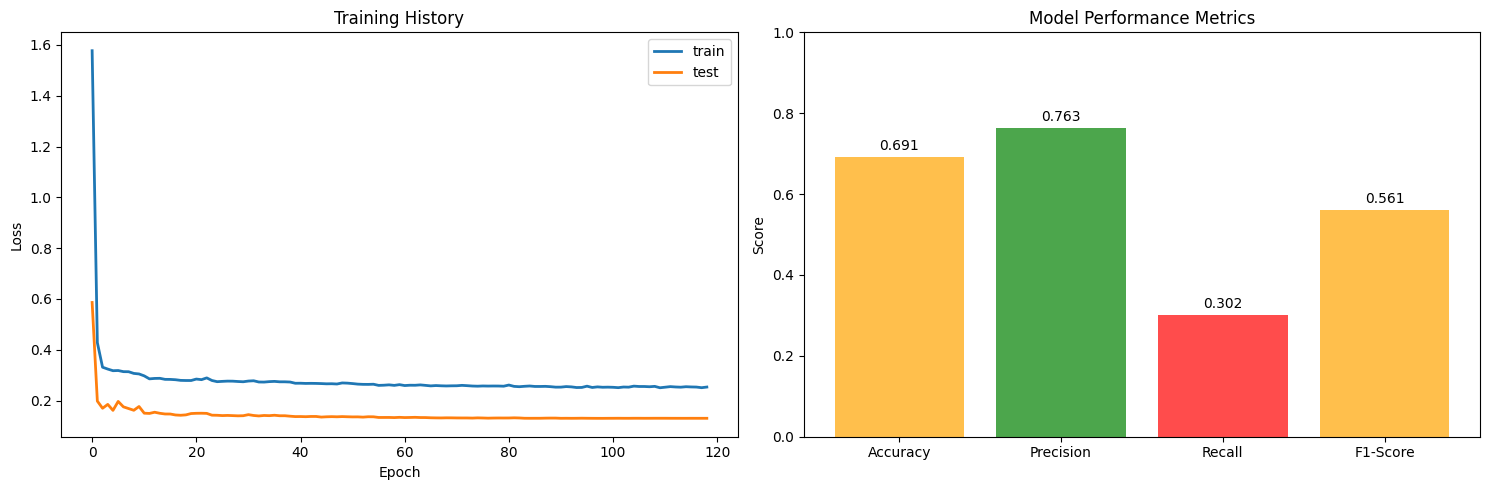


MODEL SPECIFICATIONS:
  Learning Rate: 0.002
  Dropout Rate: 0.45
  Early Stopping: 20 epochs
  Optimizer: RMSprop with momentum (0.9)
  Architecture: 64->48->24->1 with BatchNorm and regularization

TRAINING SET PERFORMANCE:
  Loss: 0.1238
  Accuracy: 0.6939
  Precision: 0.7560
  Recall: 0.3184
  F1-Score: 0.5615

TEST SET PERFORMANCE:
  Loss: 0.1260
  Accuracy: 0.6911
  Precision: 0.7632
  Recall: 0.3021
  F1-Score: 0.5614

SUMMARY:
Final Test Accuracy: 0.6911
Final Test F1-Score: 0.5614
Final Test Precision: 0.7632
Final Test Recall: 0.3021
Final Test Loss: 0.1260

DETAILED METRICS ANALYSIS:

CLASSIFICATION REPORT:
                        precision    recall  f1-score   support

        Safe Water (0)       0.68      0.94      0.79       300
Contaminated Water (1)       0.76      0.30      0.43       192

              accuracy                           0.69       492
             macro avg       0.72      0.62      0.61       492
          weighted avg       0.71      0.69      0.

In [23]:
# Visual confusion matrix and metrics
plt.figure(figsize=(15, 5))

# Plot 2: Training History
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train', linewidth=2)
plt.plot(history.history['val_loss'], label='test', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()

# Plot 3: Metrics Comparison
plt.subplot(1, 2, 2)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [test_accuracy, test_precision, test_recall, test_f1]
colors = ['green' if v > 0.7 else 'orange' if v > 0.5 else 'red' for v in metrics_values]
bars = plt.bar(metrics_names, metrics_values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# MODEL SPECIFICATIONS
print("\n" + "=" * 60)
print("MODEL SPECIFICATIONS:")
print(f"  Learning Rate: {response_model_hyperparameters['learning_rate']}")
print(f"  Dropout Rate: {response_model_hyperparameters['dropout_rate']}")
print(f"  Early Stopping: {response_model_hyperparameters['early_stopping_patience']} epochs")
print(f"  Optimizer: {response_model_hyperparameters['optimizer_type']} with momentum ({response_model_hyperparameters.get('momentum', 'N/A')})")
print(f"  Architecture: 64->48->24->1 with BatchNorm and regularization")

print(f"\nTRAINING SET PERFORMANCE:")
print(f"  Loss: {train_results[0]:.4f}")
print(f"  Accuracy: {train_results[1]:.4f}")
print(f"  Precision: {train_results[2]:.4f}")
print(f"  Recall: {train_results[3]:.4f}")
print(f"  F1-Score: {train_results[5]:.4f}")

print(f"\nTEST SET PERFORMANCE:")
print(f"  Loss: {test_results[0]:.4f}")
print(f"  Accuracy: {test_results[1]:.4f}")
print(f"  Precision: {test_results[2]:.4f}")
print(f"  Recall: {test_results[3]:.4f}")
print(f"  F1-Score: {test_results[5]:.4f}")

print(f"\nSUMMARY:")
print(f"=" * 40)
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test F1-Score: {test_f1:.4f}")
print(f"Final Test Precision: {test_precision:.4f}")
print(f"Final Test Recall: {test_recall:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")


# DETAILED METRICS
print("\nDETAILED METRICS ANALYSIS:")
print("=" * 70)

# Get predictions for test set
Y_test_pred_proba = response_model_instance.predict(X_test, verbose=0)
Y_test_pred = (Y_test_pred_proba > 0.5).astype(int).flatten()

# Detailed classification report
print("\nCLASSIFICATION REPORT:")
target_names = ['Safe Water (0)', 'Contaminated Water (1)']
print(classification_report(Y_test, Y_test_pred, target_names=target_names))